Notebook for preliminary analysis, planned function includes:

1.Finding sensor readouts that exceeds 850.(Done)

2.Finding abnormal sensor readouts in one group.(Done. Now using 15% deviation from average of the remaining 3.)

3.Finding relationships between prediction results, threshold and command.(In progress)

4.Refactoring the dataset. e.g. Combine sensor values and mv values into the same row.

In [27]:
import pandas as pd
cleaned_file_path = 'cleaned_integrated_data_20241024102534.csv'
df = pd.read_csv(cleaned_file_path)
print("Loaded DataFrame:")
print(df.head())

Loaded DataFrame:
    timestamp  sensor_2  sensor_4   mv_1   mv_2   mv_3   mv_4   fhp  \
0  3172334658       NaN       NaN  888.0  895.0  891.0  895.0   NaN   
1  3172334668     850.0     822.0  823.0  822.0  821.0  822.0   NaN   
2  3172335158       NaN       NaN  888.0  889.0  891.0  895.0   NaN   
3  3172335168       NaN       NaN  823.0  824.0  821.0  822.0   NaN   
4  3172335178     850.0     823.0    NaN    NaN    NaN    NaN  48.0   

   prediction                                    notes bad_posture_command  \
0         NaN                                      NaN                  no   
1         NaN  Sensor 2 val replaced by max valid val                   no   
2         NaN                                      NaN                  no   
3         NaN                                      NaN                  no   
4         1.0                                      NaN                  no   

   model_threshold                                        model_notes  
0             

In [28]:
sensor_2_saturated = df[df['sensor_2'] >= 850]
print("\nRows where sensor_2 >= 850:")
print(sensor_2_saturated)


Rows where sensor_2 >= 850:
      timestamp  sensor_2  sensor_4   mv_1   mv_2   mv_3   mv_4   fhp  \
1    3172334668     850.0     822.0  823.0  822.0  821.0  822.0   NaN   
4    3172335178     850.0     823.0    NaN    NaN    NaN    NaN  48.0   
7    3172335698     850.0     824.0    NaN    NaN    NaN    NaN  46.0   
9    3172336178     850.0     825.0  823.0  824.0  825.0  826.0   NaN   
11   3172336668     850.0     825.0  823.0  824.0  825.0  826.0   NaN   
14   3172337178     850.0     825.0    NaN    NaN    NaN    NaN  42.0   
17   3172337698     850.0     824.0    NaN    NaN    NaN    NaN  43.0   
19   3172338178     850.0     823.0  823.0  824.0  823.0  823.0   NaN   
21   3172338668     850.0     824.0  826.0  824.0  823.0  823.0   NaN   
24   3172339178     850.0     824.0    NaN    NaN    NaN    NaN  42.0   
27   3172339698     850.0     824.0    NaN    NaN    NaN    NaN  41.0   
29   3172340178     850.0     824.0  826.0  822.0  824.0  825.0   NaN   
32   3172340678     85

In [29]:
sensor_4_saturated = df[df['sensor_4'] >= 850]
print("\nRows where sensor_4 >= 850:")
print(sensor_4_saturated)


Rows where sensor_4 >= 850:
      timestamp  sensor_2  sensor_4  mv_1  mv_2  mv_3  mv_4  fhp  prediction  \
549  3172429188     849.0     850.0   NaN   NaN   NaN   NaN  NaN         1.0   

                                            notes bad_posture_command  \
549  Sensor 2 val replaced by previous valid val                   no   

     model_threshold model_notes  
549             71.5         NaN  


In [30]:
threshold = 0.15  
abnormal_mv_rows = []

for index, row in df.iterrows():
    mv_values = [row['mv_1'], row['mv_2'], row['mv_3'], row['mv_4']]
    avg_mv = sum(mv_values) / len(mv_values)

    for mv in mv_values:
        if abs(mv - avg_mv) / avg_mv > threshold:
            abnormal_mv_rows.append(row)
            break

abnormal_mv_df = pd.DataFrame(abnormal_mv_rows)
print("\nRows with abnormal mv readings:")
print(abnormal_mv_df)


Rows with abnormal mv readings:
       timestamp  sensor_2  sensor_4    mv_1   mv_2    mv_3    mv_4  fhp  \
129   3172357158       NaN       NaN   886.0  624.0   929.0   922.0  NaN   
132   3172357678       NaN       NaN   886.0  624.0   626.0   922.0  NaN   
135   3172358158       NaN       NaN   886.0  624.0   626.0   746.0  NaN   
336   3172393658       NaN       NaN   980.0  988.0  1187.0   927.0  NaN   
342   3172394658       NaN       NaN  1250.0  988.0  1187.0  1255.0  NaN   
...          ...       ...       ...     ...    ...     ...     ...  ...   
3702  3173151658       NaN       NaN   527.0  594.0   822.0   534.0  NaN   
3703  3173151678       NaN       NaN   599.0  676.0   767.0   596.0  NaN   
3705  3173152158       NaN       NaN   527.0  594.0   822.0   678.0  NaN   
3708  3173152658       NaN       NaN   676.0  594.0   822.0   678.0  NaN   
3711  3173153158       NaN       NaN   676.0  669.0   822.0   678.0  NaN   

      prediction  notes bad_posture_command  model_thr

In [31]:
abnormal_mv_rows = []

for index, row in df.iterrows():
    mv_values = [row['mv_1'], row['mv_2'], row['mv_3'], row['mv_4']]
    
    # Check each mv value against the average of the other three
    for i in range(4):
        # Calculate the average of the other three mv values
        avg_of_others = sum(mv_values[j] for j in range(4) if j != i) / 3
        
        # Check if the current mv value is significantly different from the average of the others
        if abs(mv_values[i] - avg_of_others) / avg_of_others > threshold:
            abnormal_mv_rows.append(row)
            break  # Break to avoid adding the same row multiple times

# Convert the list of abnormal rows to a DataFrame
abnormal_mv_df = pd.DataFrame(abnormal_mv_rows)

print("\nRows with abnormal mv readings:")
print(abnormal_mv_df)


Rows with abnormal mv readings:
       timestamp  sensor_2  sensor_4   mv_1   mv_2   mv_3   mv_4  fhp  \
111   3172354158       NaN       NaN  878.0  810.0  784.0  968.0  NaN   
114   3172354658       NaN       NaN  909.0  810.0  784.0  968.0  NaN   
117   3172355158       NaN       NaN  909.0  947.0  784.0  968.0  NaN   
129   3172357158       NaN       NaN  886.0  624.0  929.0  922.0  NaN   
130   3172357168       NaN       NaN  813.0  690.0  812.0  818.0  NaN   
...          ...       ...       ...    ...    ...    ...    ...  ...   
3703  3173151678       NaN       NaN  599.0  676.0  767.0  596.0  NaN   
3705  3173152158       NaN       NaN  527.0  594.0  822.0  678.0  NaN   
3706  3173152168       NaN       NaN  599.0  676.0  767.0  725.0  NaN   
3708  3173152658       NaN       NaN  676.0  594.0  822.0  678.0  NaN   
3711  3173153158       NaN       NaN  676.0  669.0  822.0  678.0  NaN   

      prediction  notes bad_posture_command  model_threshold  model_notes  
111          N

In [36]:
bad_posture= df[(df['bad_posture_command'] == 'yes')]
bad_posture_pred_0 = df[(df['bad_posture_command'] == 'yes') & (df['prediction'] == 0)]
bad_posture_pred_1 = df[(df['bad_posture_command'] == 'yes') & (df['prediction'] == 1)]
average_diff_bad_posture_pred_0 = (bad_posture_pred_0['sensor_2'] - bad_posture_pred_0['sensor_4']).abs().mean()
average_diff_bad_posture_pred_1 = (bad_posture_pred_1['sensor_2'] - bad_posture_pred_1['sensor_4']).abs().mean()


In [37]:
print(average_diff_bad_posture_pred_0)

81.71739130434783


In [38]:
print(average_diff_bad_posture_pred_1)

45.3578431372549


C:\Users\ARC\AppData\Local\Temp\ipykernel_5844\1996499604.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model_threshold'].fillna(method='ffill', inplace=True)
C:\Users\ARC\AppData\Local\Temp\ipykernel_5844\1996499604.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['model_threshold'].fillna(method='ffill', inplace=True)


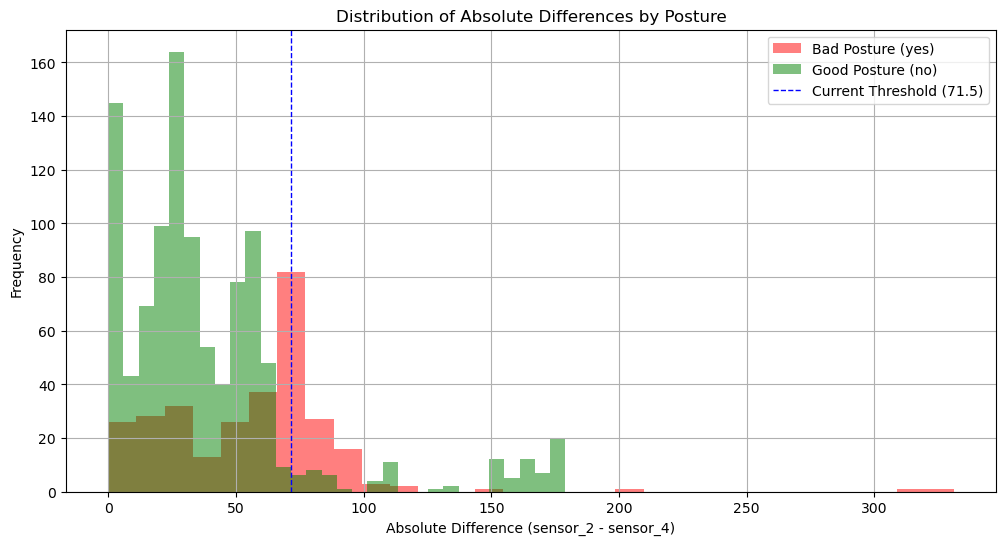

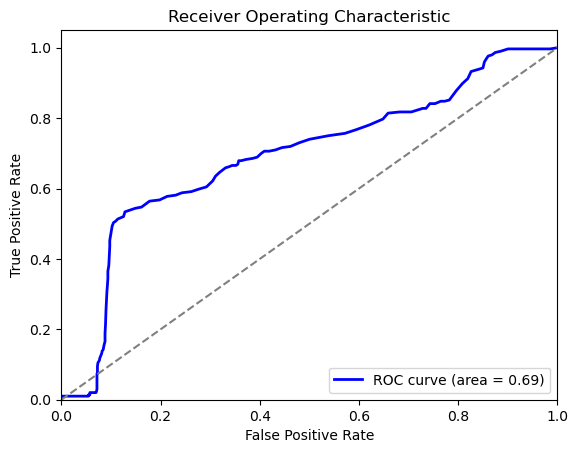

Optimal Threshold: 61.00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

cleaned_file_path = 'cleaned_integrated_data_20241024102534.csv'  # Replace with the actual path
df = pd.read_csv(cleaned_file_path)

df['model_threshold'].fillna(method='ffill', inplace=True)

df.dropna(subset=['sensor_2', 'sensor_4'], inplace=True)

df = df.drop(columns=['mv_1', 'mv_2', 'mv_3', 'mv_4', 'fhp', 'notes', 'model_notes'])

df['abs_diff'] = (df['sensor_2'] - df['sensor_4']).abs()

for idx, row in df.iterrows():
    if pd.isnull(row['prediction']):  # Check if the prediction is NaN
        if row['abs_diff'] > row['model_threshold']:
            df.at[idx, 'prediction'] = 0  # Bad posture
        else:
            df.at[idx, 'prediction'] = 1  # Good posture

if df['prediction'].isnull().any():
    print("Warning: There are still NaN values in prediction.")
else:
    bad_posture = df[df['bad_posture_command'] == 'yes']['abs_diff']
    good_posture = df[df['bad_posture_command'] == 'no']['abs_diff']

    plt.figure(figsize=(12, 6))
    plt.hist(bad_posture, bins=30, alpha=0.5, label='Bad Posture (yes)', color='red')
    plt.hist(good_posture, bins=30, alpha=0.5, label='Good Posture (no)', color='green')
    plt.axvline(71.5, color='blue', linestyle='dashed', linewidth=1, label='Current Threshold (71.5)')
    plt.title('Distribution of Absolute Differences by Posture')
    plt.xlabel('Absolute Difference (sensor_2 - sensor_4)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid()
    plt.show()

    y_true = np.where(df['bad_posture_command'] == 'yes', 1, 0)
    y_scores = df['abs_diff']

    if y_scores.isnull().any():
        print("Warning: There are still NaN values in abs_diff.")
    else:
        fpr, tpr, thresholds = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]
        print(f'Optimal Threshold: {optimal_threshold:.2f}')